In [3]:
import pandas as pd
import joblib
import glob
import matplotlib.pyplot as plt
from sklearn.metrics import mean_pinball_loss

In [4]:
X = pd.read_csv("/Users/florian/Documents/github/DP2/Energy_production_price_prediction/Generation_forecast/Solar_forecast/data/test.csv")

In [5]:
X_test = X.drop(columns=["Solar_MWh_credit"])
y_test = X["Solar_MWh_credit"]
model_paths = glob.glob("models/i2_models/*.pkl")

In [6]:
predictions = {model_path: joblib.load(model_path).predict(X_test) for model_path in model_paths}

In [7]:
alpha_val = {"q1": 0.1, "q2": 0.2, "q3": 0.3, "q4": 0.4, "q5": 0.5, "q6": 0.6, "q7": 0.7, "q8": 0.8, "q9": 0.9}


mean_pinball_losses = {model_path: mean_pinball_loss(y_test, predictions[model_path], alpha= alpha_val[model_path.split("_")[-1].split(".")[0]]) for model_path in model_paths}

In [8]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(y= y_test, name= "True Values", mode= "lines"))
for model_path, prediction in predictions.items():
    fig.add_trace(go.Scatter(y= prediction, name= f"Predictions {model_path.split("/")[-1]}, Loss: {mean_pinball_losses[model_path]}", mode= "lines"))

fig.update_layout(title= "True Values vs Predictions", xaxis_title= "Time", yaxis_title= "Solar Production (MWh)")
fig.show()

In [9]:
import plotly.graph_objects as go

# Beispielhafte Quantile und Verluste
quantiles = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
losses = [mean_pinball_losses[model_path] for model_path in model_paths]

fig = go.Figure()
fig.add_trace(go.Scatter(x=quantiles, y=losses, mode='lines+markers', name='Quantile Loss'))

fig.update_layout(title='Quantile Loss Plot', xaxis_title='Quantile', yaxis_title='Loss')
fig.show()

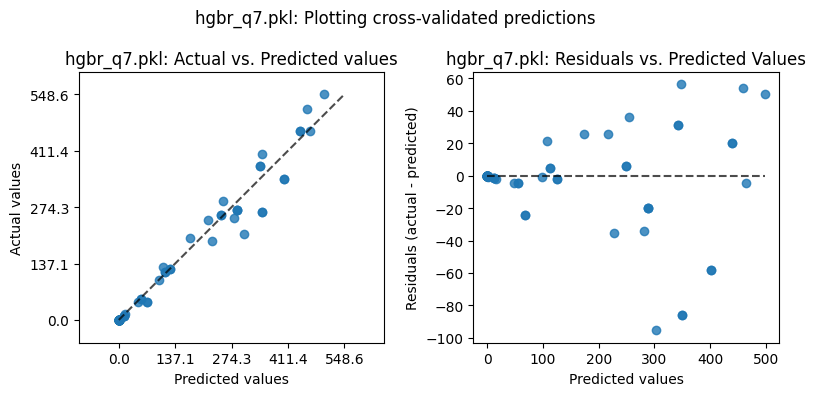

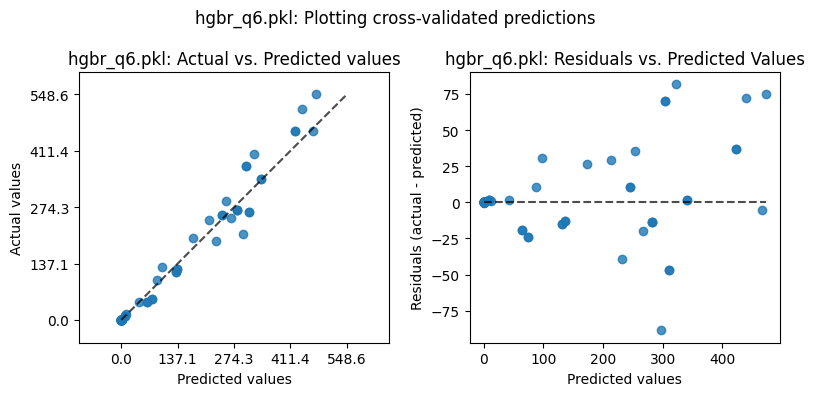

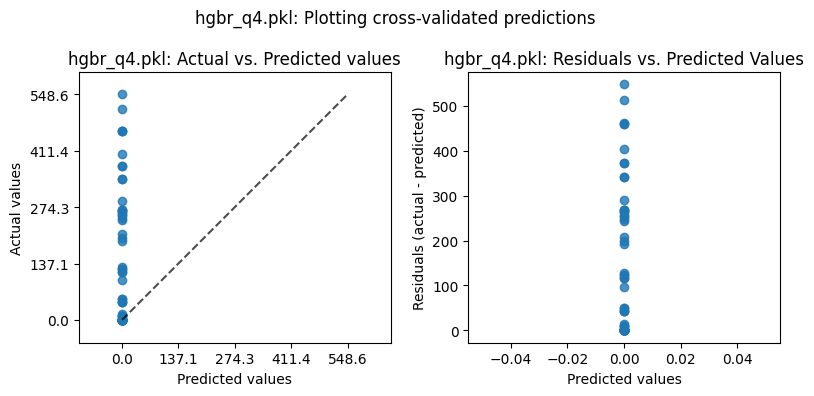

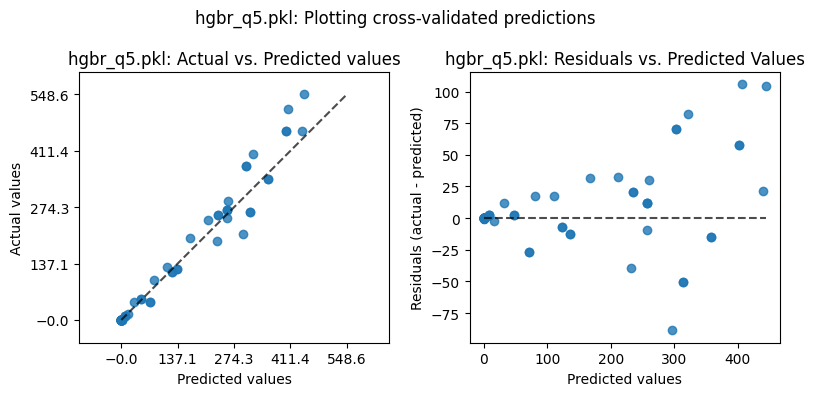

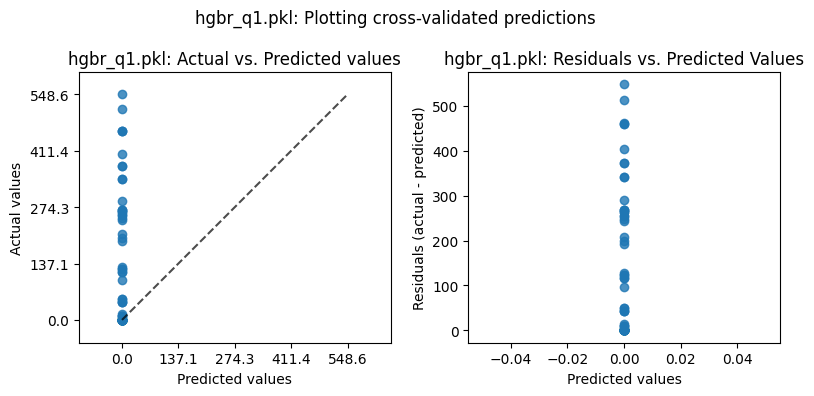

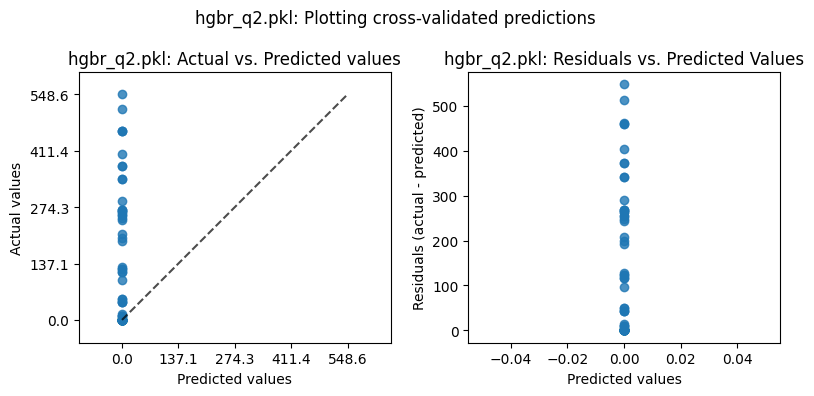

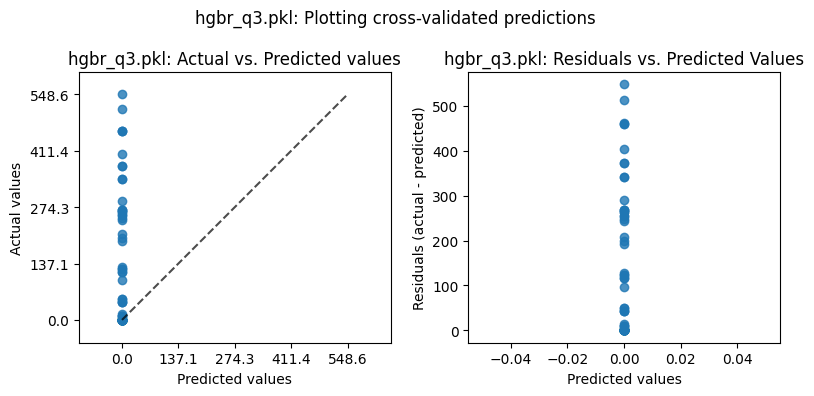

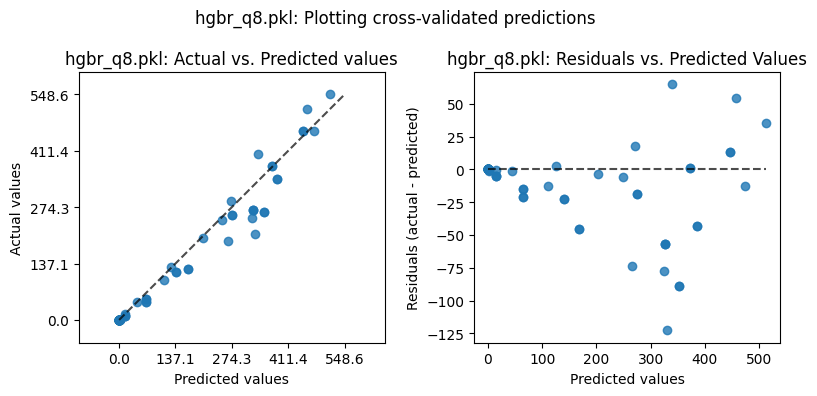

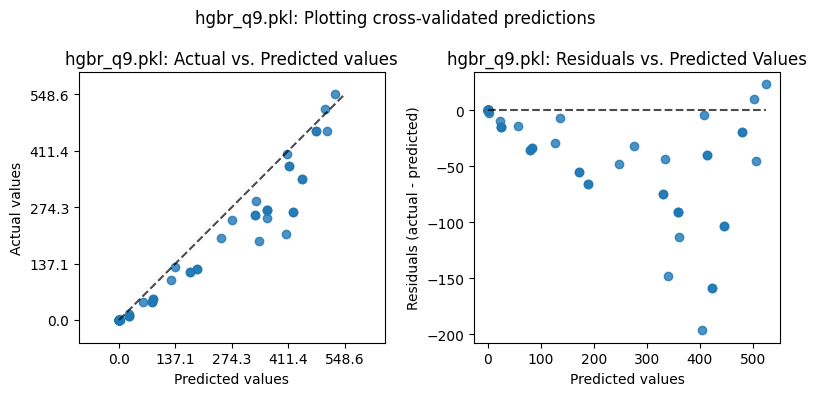

In [11]:
from sklearn.metrics import PredictionErrorDisplay
import matplotlib.pyplot as plt


for model_path, prediction in predictions.items():

    fig, axs = plt.subplots(ncols=2, figsize=(8, 4))
    PredictionErrorDisplay.from_predictions(
        y_test,
        y_pred=prediction,
        kind="actual_vs_predicted",
        subsample=100,
        ax=axs[0],
        random_state=0,
    )
    axs[0].set_title(f"{model_path.split("/")[-1]}: Actual vs. Predicted values")
    PredictionErrorDisplay.from_predictions(
        y_test,
        y_pred=prediction,
        kind="residual_vs_predicted",
        subsample=100,
        ax=axs[1],
        random_state=0,
    )
    axs[1].set_title(f"{model_path.split("/")[-1]}: Residuals vs. Predicted Values")
    fig.suptitle(f"{model_path.split("/")[-1]}: Plotting cross-validated predictions")
    plt.tight_layout()
    plt.show()